In [471]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [472]:
#making a list of the features that will be column headers 
headerList = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'ph', 'sulfates', 'alcohol', 'quality']

#importing the dataset 
wineData = pd.read_csv('winequality-red.csv', sep=";")
print(wineData.head())
wineData

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [473]:
#Checking for and removing null values
wineData.isna().sum() 
wineData = wineData.fillna(0)

#checking for null instances to make sure they are replaced
print("# of Null Instances for each feature:")
wineData.isna().sum()

# of Null Instances for each feature:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [474]:
#Summarative functions
wineData.dtypes
wineData.describe()
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


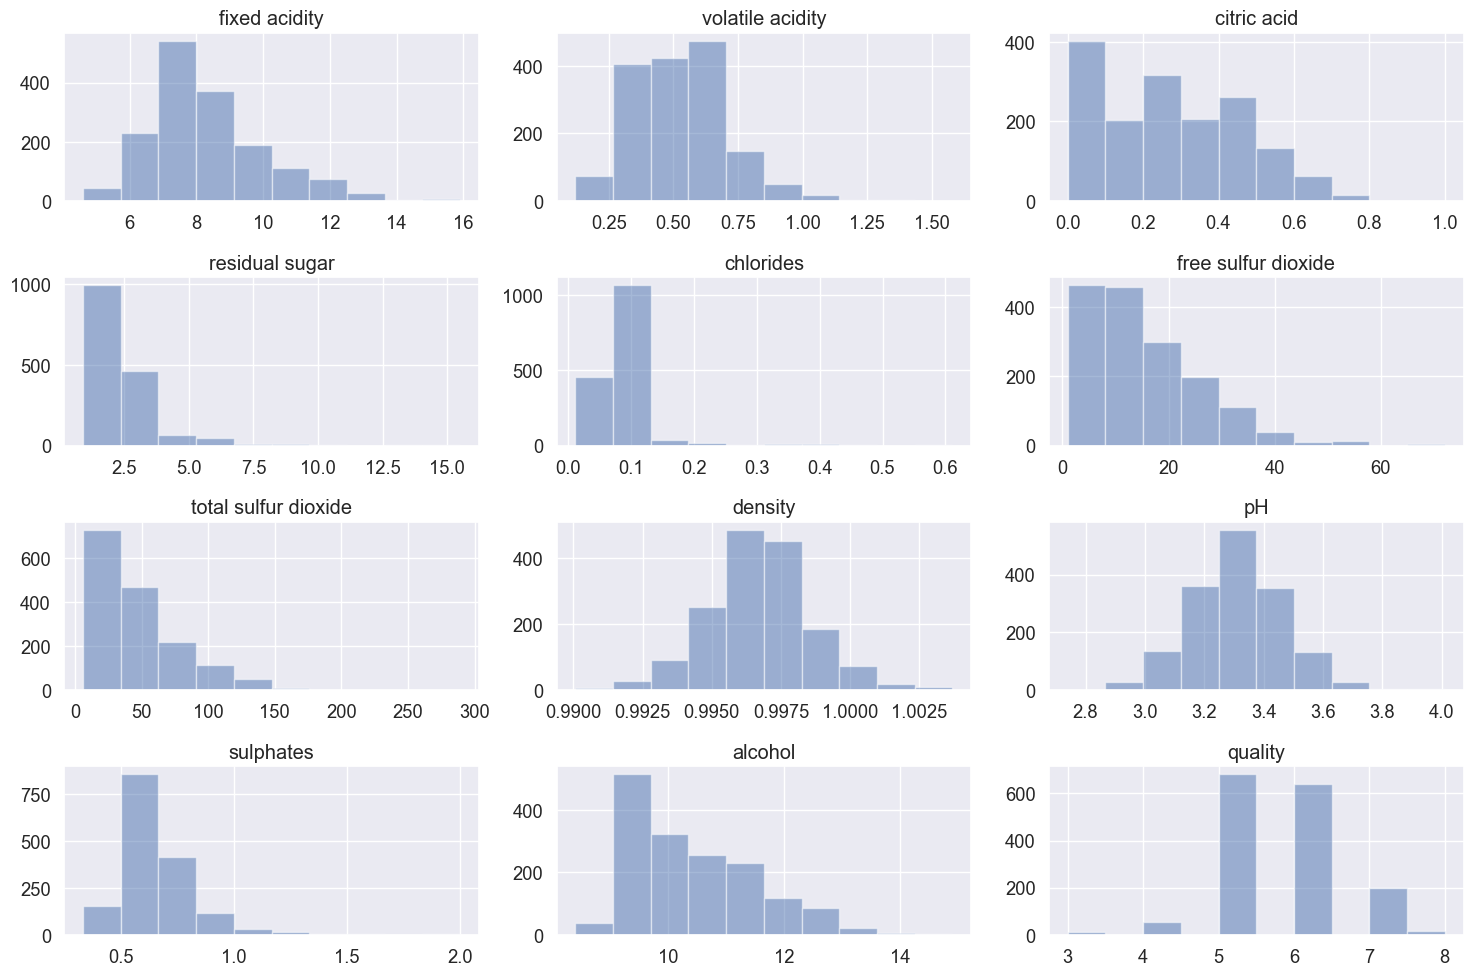

In [475]:
#Plotting histograms of each feature
wineData.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [476]:
#Formatting and dividing the data so the wine quality is the target variable (y) and the other 11 features are input variables (x)
X_data = wineData.copy().drop('quality', axis=1)
y_data = wineData['quality']

In [477]:
X_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [478]:
y_data

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

## PCA 

In [479]:
pca_data = wineData.copy()
X_pca = pca_data.loc[:, 'fixed acidity':'alcohol']
y_pca = pca_data['quality']
X_pca.tail()
X_pca = StandardScaler().fit_transform(X_pca)
pca = PCA(n_components = 2) #2D
X_pca = pca.fit_transform(X_pca) #fitting the PCA
X_pca.shape

(1599, 2)

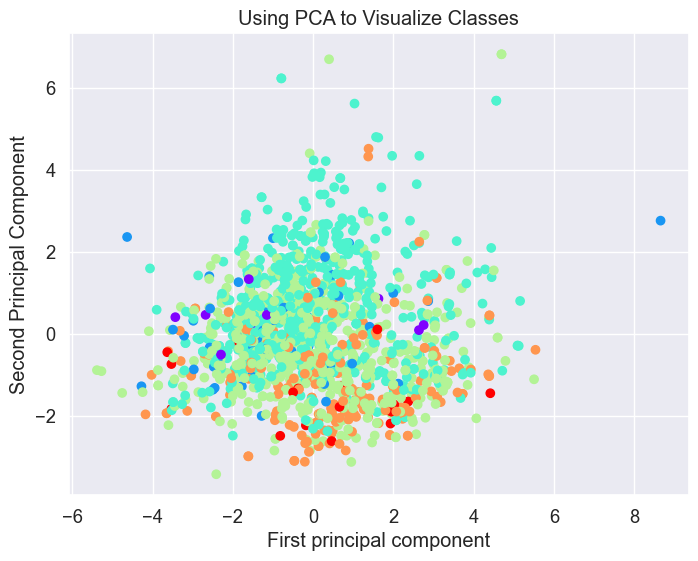

In [480]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

In [481]:
print("components: ", pca.components_)
print("explained variance: ", pca.explained_variance_)
explained_variance_ratio = pca.explained_variance_ratio_
print("explained variance ratio: ", explained_variance_ratio)

components:  [[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]]
explained variance:  [3.10107182 1.92711489]
explained variance ratio:  [0.28173931 0.1750827 ]


## Feature Selection

In [482]:
X_f = wineData.loc[:, 'fixed acidity':'alcohol']
y_f = wineData['quality']

bestFeatures = SelectKBest(score_func=chi2, k=11)
bestFeaturesFit = bestFeatures.fit(X_f,y_f)
scores = pd.DataFrame(bestFeaturesFit.scores_)  #storing feature scores in a column 
predictor_variables = pd.DataFrame(X_f.columns)  #storing predictor variable (feature) names in a column

#concatenate scores with predictor names
predScores = pd.concat([predictor_variables,scores],axis=1)
predScores.columns = ['Predictor Variable','Score']  

print("Features ranked from highest score to lowest")
print(predScores.nlargest(12, 'Score'))

Features ranked from highest score to lowest
      Predictor Variable        Score
6   total sulfur dioxide  2755.557984
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
2            citric acid    13.025665
0          fixed acidity    11.260652
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655
7                density     0.000230


In [483]:
#dropping the bottom 3 features
data_bestFeatures = wineData.copy().drop('chlorides', axis=1)
data_bestFeatures = data_bestFeatures.drop('pH', axis=1)
data_bestFeatures = data_bestFeatures.drop('density', axis=1)

selected_X = data_bestFeatures.loc[:, 'fixed acidity':'alcohol']
selected_y = data_bestFeatures['quality']

selected_X

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,1.9,11.0,34.0,0.56,9.4
1,7.8,0.880,0.00,2.6,25.0,67.0,0.68,9.8
2,7.8,0.760,0.04,2.3,15.0,54.0,0.65,9.8
3,11.2,0.280,0.56,1.9,17.0,60.0,0.58,9.8
4,7.4,0.700,0.00,1.9,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,32.0,44.0,0.58,10.5
1595,5.9,0.550,0.10,2.2,39.0,51.0,0.76,11.2
1596,6.3,0.510,0.13,2.3,29.0,40.0,0.75,11.0
1597,5.9,0.645,0.12,2.0,32.0,44.0,0.71,10.2


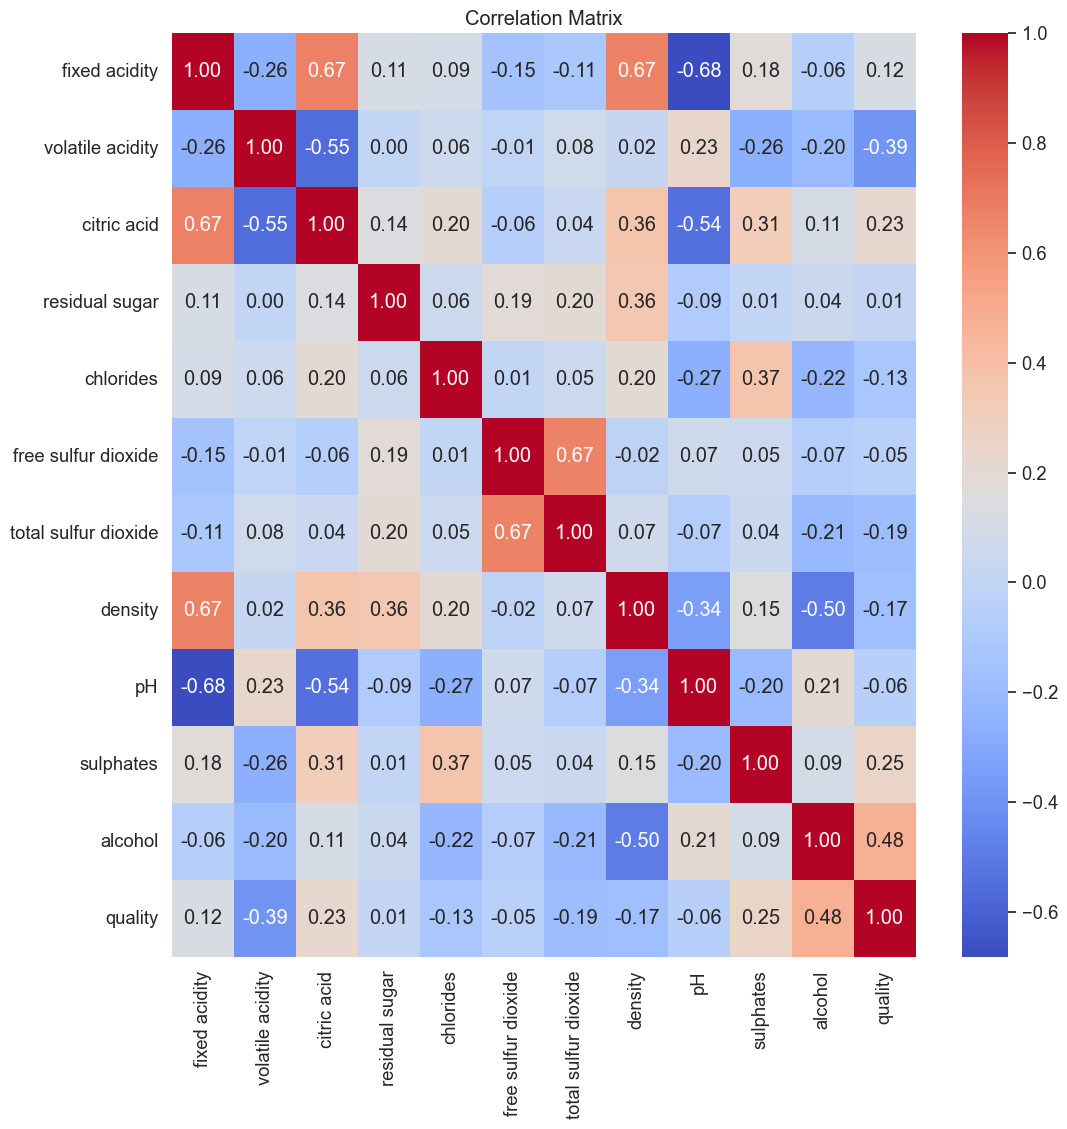

In [484]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(wineData.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [485]:
# don't use feature selection because none of the correlations are particularily strong 

## Splitting and Scaling the Data - Train Test Split

In [486]:
X = wineData.loc[:, 'fixed acidity':'alcohol']
y = wineData['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5) #split the data; #add random state later for consistency
X_train.shape, y_train.shape, X_test.shape, y_test.shape

scaledData = StandardScaler()
X_train_scaled = scaledData.fit_transform(X_train)
X_test_scaled = scaledData.transform(X_test)

#scaling the data (as shown by the code above) increases accuracy. Something to mention in the paper for sure
#also increasing/decreasing the max_iter count increses/decreased accuracy

## Logistic Regression Model

In [487]:
wineLR = LogisticRegression()
wineLR.fit(X_train, y_train)
y_pred_test = wineLR.predict(X_test)
y_pred_train = wineLR.predict(X_train)
#print(y_test)
#print(y_pred_test)
print("Logistic Regression (not scaled data) Weights: \n ",  wineLR.coef_, '\n')
print("Logistic Regression (not scaled data) Constant: \n ", wineLR.intercept_)

Logistic Regression (not scaled data) Weights: 
  [[ 2.35262329e-02  9.77812218e-02 -2.51160913e-02  1.08370494e-01
   9.10569387e-03  6.22431243e-02 -3.83039709e-02 -5.70172498e-03
   2.83678145e-03 -2.60079449e-02 -2.02398033e-01]
 [-2.19226885e-01  3.80205022e-01 -1.45756222e-01  1.01294780e-01
   1.72351163e-02 -2.59680635e-02  4.64175815e-03  6.94634679e-02
   3.00703638e-01 -5.81922963e-02  8.54329707e-03]
 [ 2.09469743e-01  9.54527044e-01 -4.89322488e-01 -9.92134914e-02
   1.19697495e-01 -2.24905142e-02  3.08550498e-02  4.81112413e-01
   1.69914991e+00 -3.99615621e-01 -6.96517235e-01]
 [ 9.78866510e-02 -4.25145665e-01 -1.15062532e-02 -1.16046912e-01
  -4.57704440e-02 -1.25673789e-03  1.45380876e-02 -9.32630516e-02
  -3.10575585e-01  2.08828303e-01  2.18651971e-01]
 [ 1.28729275e-01 -9.20890948e-01  6.13037485e-01 -4.38205078e-02
  -8.58379851e-02  1.97208366e-02 -1.48139388e-04 -3.84964986e-01
  -1.44793280e+00  2.59042237e-01  4.86475715e-01]
 [-2.40385017e-01 -8.64766747e-02  

In [488]:
print("Accuracy on test data without data scaling", accuracy_score(y_test, y_pred_test))
print("Accuracy on training data without data scaling", accuracy_score(y_train, y_pred_train))

Accuracy on test data without data scaling 0.5916666666666667
Accuracy on training data without data scaling 0.5853440571939231


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.83      0.67      0.74       262
           6       0.60      0.50      0.54       217
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0

    accuracy                           0.59       480
   macro avg       0.24      0.19      0.21       480
weighted avg       0.72      0.59      0.65       480



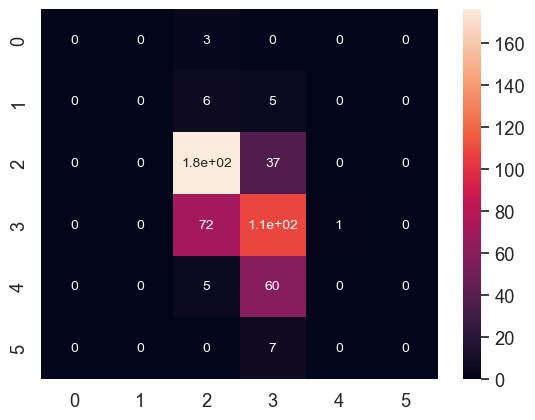

In [489]:
report = classification_report(y_pred_test, y_test) #classification report (including accuracy) 
print(report)

cmatrix = confusion_matrix(y_test, y_pred_test) #confusion matrix 
df_cmatrix = pd.DataFrame(cmatrix)
sns.set(font_scale=1.2)
sns.heatmap(df_cmatrix, annot=True, annot_kws={"size": 10}) 
plt.show()

In [490]:
wineLR.fit(X_train_scaled, y_train)
y_pred_test_scaled = wineLR.predict(X_test_scaled)
y_pred_train_scaled = wineLR.predict(X_train_scaled)
print("Logistic Regression (scaled data) Weights: \n ",  wineLR.coef_, '\n')
print("Logistic Regression (scaled data) Constant: \n ", wineLR.intercept_)

Logistic Regression (scaled data) Weights: 
  [[ 0.31417626  1.09728746  0.04789632 -0.05463173  0.72254187  0.42054001
  -0.62665784  0.69448995  0.63673051 -0.62213841 -0.65467364]
 [-0.07878915  0.62983382  0.11602958  0.14116131  0.18677602 -0.23351837
  -0.06774338 -0.46307314  0.17041171 -0.21891322 -0.88855916]
 [-0.35730253 -0.05465437 -0.10471305 -0.17639747  0.1981637  -0.21622645
   0.81687018  0.29244483 -0.16002355 -0.38451391 -0.5236879 ]
 [-0.16381752 -0.47608314 -0.32596566 -0.18820015  0.02544558 -0.05202891
   0.32837516  0.20607439 -0.1534264   0.01971096  0.22824245]
 [ 0.21763303 -0.91668633  0.046958    0.12890497 -0.31763453  0.12897957
  -0.11734461 -0.21551453 -0.09307239  0.47958556  0.63534367]
 [ 0.06809991 -0.27969744  0.21979481  0.14916307 -0.81529262 -0.04774586
  -0.33349951 -0.51442149 -0.40061988  0.72626902  1.20333458]] 

Logistic Regression (scaled data) Constant: 
  [-3.10996993 -0.16978106  2.70458974  2.86322264  0.59741842 -2.88547981]


In [491]:
print("Accuracy on test data with data scaling", accuracy_score(y_test, y_pred_test_scaled))
print("Accuracy on training data with data scaling", accuracy_score(y_train, y_pred_train_scaled))

Accuracy on test data with data scaling 0.6125
Accuracy on training data with data scaling 0.6032171581769437


              precision    recall  f1-score   support

           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           5       0.82      0.70      0.75       250
           6       0.57      0.53      0.55       196
           7       0.25      0.50      0.33        32
           8       0.00      0.00      0.00         0

    accuracy                           0.61       480
   macro avg       0.33      0.45      0.35       480
weighted avg       0.67      0.61      0.64       480



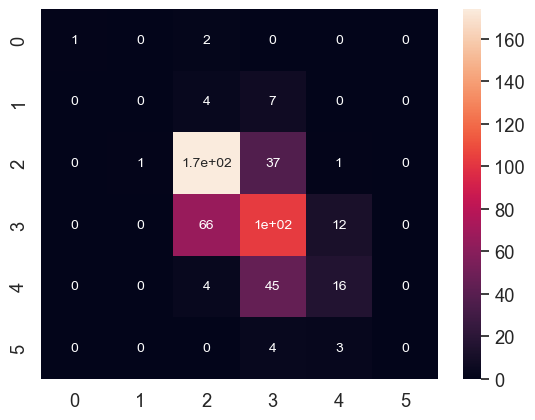

In [492]:
report = classification_report(y_pred_test_scaled, y_test) #classification report (including accuracy) 
print(report)

cmatrix = confusion_matrix(y_test, y_pred_test_scaled) #confusion matrix 
df_cmatrix = pd.DataFrame(cmatrix)
sns.set(font_scale=1.2)
sns.heatmap(df_cmatrix, annot=True, annot_kws={"size": 10}) 
plt.show()

In [493]:
print("Accuracy on test data without data scaling", accuracy_score(y_test, y_pred_test))
print("Accuracy on test data with data scaling", accuracy_score(y_test, y_pred_test_scaled))

Accuracy on test data without data scaling 0.5916666666666667
Accuracy on test data with data scaling 0.6125


## Random Forest Classifier

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.81      0.70      0.75       248
           6       0.61      0.62      0.62       178
           7       0.48      0.65      0.55        48
           8       0.14      1.00      0.25         1

    accuracy                           0.66       480
   macro avg       0.34      0.49      0.36       480
weighted avg       0.70      0.66      0.67       480



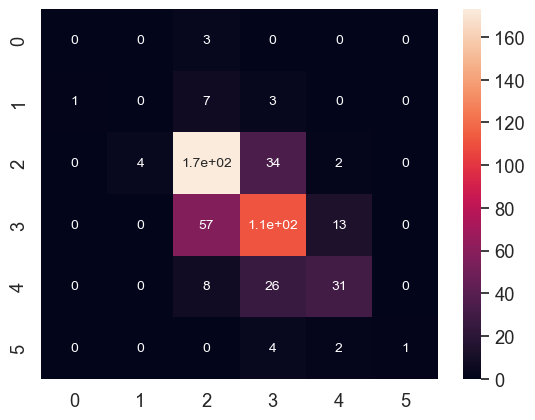

In [458]:
wineRF2 = RandomForestClassifier(n_estimators = 10, random_state=5) #n_estimators=10 was the default for previous versions of sklearn so we'll use that
wineRF2.fit(X_train, y_train)

y_pred = wineRF2.predict(X_test)

report = classification_report(y_pred, y_test) #classification report (including accuracy) 
print(report)

cmatrix = confusion_matrix(y_test, y_pred) #confusion matrix 
df_cmatrix = pd.DataFrame(cmatrix)
sns.set(font_scale=1.2)
sns.heatmap(df_cmatrix, annot=True, annot_kws={"size": 10}) 
plt.show()

### Hyperparameter Tuning

In [459]:
#plan is to have one random forest with optimal parameters found through grid search and one with default
wineRF = RandomForestClassifier(random_state = 5)
param_grid_RF = {'n_estimators': [100,200,300,400,500,1000],
              'max_depth': [10,12,14,16,18,20] }
mr_grid = GridSearchCV(estimator=wineRF, param_grid = param_grid_RF, cv = 7)
mr_grid.fit(X_train, y_train)
print(mr_grid.best_params_)

#this takes a few minutes to run 

{'max_depth': 16, 'n_estimators': 200}


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.84      0.76      0.79       235
           6       0.69      0.63      0.66       197
           7       0.54      0.76      0.63        46
           8       0.14      1.00      0.25         1

    accuracy                           0.70       480
   macro avg       0.37      0.52      0.39       480
weighted avg       0.74      0.70      0.72       480



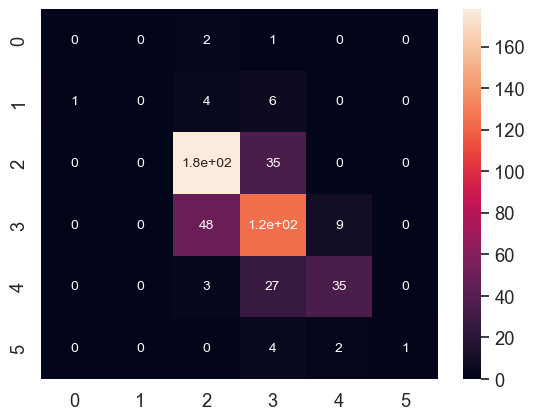

In [460]:
wineRF_optimized = RandomForestClassifier(n_estimators=200, max_depth=16, random_state=5)
wineRF_optimized.fit(X_train, y_train)
y_pred = wineRF_optimized.predict(X_test)


report = classification_report(y_pred, y_test) #classification report (including accuracy) 
print(report)

cmatrix = confusion_matrix(y_test, y_pred) #confusion matrix 
df_cmatrix = pd.DataFrame(cmatrix)
sns.set(font_scale=1.2)
sns.heatmap(df_cmatrix, annot=True, annot_kws={"size": 10}) 
plt.show()

In [461]:
print("Accuracy on unoptimized RFC", wineRF2.score(X_test, y_test))
print("Accuracy on optimized RFC", wineRF_optimized.score(X_test, y_test))

Accuracy on unoptimized RFC 0.6583333333333333
Accuracy on optimized RFC 0.7041666666666667


## Support Vector Machine Model

In [462]:
#classification for rbf kernel
wineSVM = SVC(kernel = 'rbf')
wineSVM.fit(X_train, y_train)
y_pred = wineSVM.predict(X_test)
rbf_report = classification_report(y_test, y_pred)
print("rbf kernel classification report: \n",rbf_report)

#classification for sigmoid kernel
wineSVM = SVC(kernel = 'sigmoid')
wineSVM.fit(X_train, y_train)
y_pred = wineSVM.predict(X_test)
sigmoid_report = classification_report(y_test, y_pred)
print("sigmoid kernel classification report: \n", sigmoid_report)

#classification for poly kernel
wineSVM = SVC(kernel = 'poly')
wineSVM.fit(X_train, y_train)
y_pred = wineSVM.predict(X_test)
poly_report = classification_report(y_test, y_pred)
print("poly kernel classification report: \n", poly_report)

rbf kernel classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.68      0.43      0.53       213
           6       0.43      0.82      0.56       181
           7       1.00      0.02      0.03        65
           8       0.00      0.00      0.00         7

    accuracy                           0.50       480
   macro avg       0.35      0.21      0.19       480
weighted avg       0.60      0.50      0.45       480

sigmoid kernel classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.48      0.54      0.51       213
           6       0.42      0.53      0.47       181
           7       0.00      0.00      0.00        65
           8       0.00      0.00      0.00         7

 

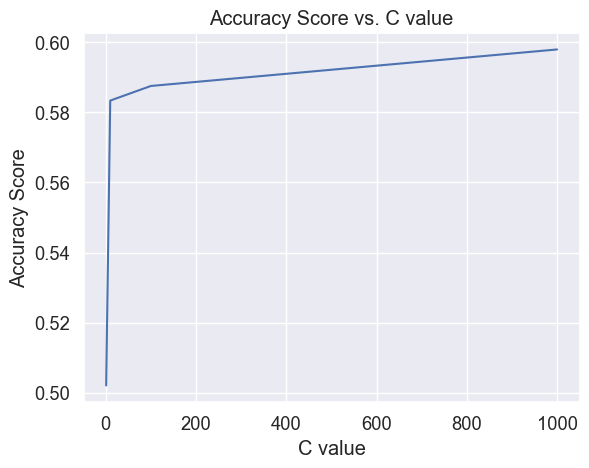

[0.5020833333333333, 0.5833333333333334, 0.5875, 0.5979166666666667]

In [470]:
#Testing the effect of C values on SVM accuracy 
C_values = [1, 10, 100, 1000]
Cval_scores = []

for c in C_values: 
    wineSVM = SVC(C=c, kernel='rbf')
    wineSVM.fit(X_train, y_train)
    y_pred = wineSVM.predict(X_test)
    Cval_scores.append(accuracy_score(y_test, y_pred))

plt.plot(C_values, Cval_scores)
plt.xlabel("C value" )
plt.ylabel("Accuracy Score") 
plt.title("Accuracy Score vs. C value")
plt.show()
Cval_scores

### Hyperparameter Tuning

In [464]:
wineSVM = SVC()
param_grid_svm = {
    'kernel': ['rbf','sigmoid','poly'], 
    'C': [1, 10, 100, 1000]
}

CV_svm = GridSearchCV(estimator=wineSVM, param_grid=param_grid_svm, cv= 10)
CV_svm.fit(X_train, y_train)

#print the result of best hyperparameters
print(CV_svm.best_params_)

{'C': 1000, 'kernel': 'rbf'}


Accuracy on optimized SVM:  0.5979166666666667 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.83      0.67      0.74       264
           6       0.57      0.51      0.54       204
           7       0.11      0.58      0.18        12
           8       0.00      0.00      0.00         0

    accuracy                           0.60       480
   macro avg       0.25      0.29      0.24       480
weighted avg       0.70      0.60      0.64       480



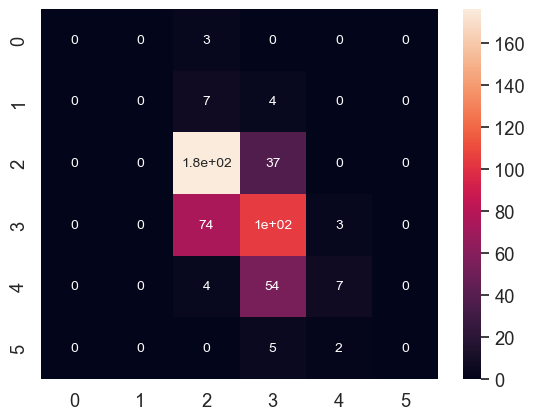

In [465]:
wineSVM = SVC(kernel = 'rbf', C = 1000)
wineSVM.fit(X_train, y_train)
y_pred = wineSVM.predict(X_test)

print("Accuracy on optimized SVM: ", wineSVM.score(X_test,y_test), "\n")

report = classification_report(y_pred, y_test) #classification report (including accuracy) 
print(report)

cmatrix = confusion_matrix(y_test, y_pred) #confusion matrix 
df_cmatrix = pd.DataFrame(cmatrix)
sns.set(font_scale=1.2)
sns.heatmap(df_cmatrix, annot=True, annot_kws={"size": 10}) 
plt.show()